# Imports

In [ ]:
import numpy as np
import tensorflow as tf
import keras

from keras.preprocessing.image import load_img, img_to_array
from keras.applications.inception_resnet_v2 import preprocess_input

from IPython.core.display import display

# Constants


In [ ]:
FILE_1 = '01 Umbrella.jpg'
FILE_2 = '02 Couple.jpg'
FILE_3 = '03 Ocean.jpg'

# Pre-Processing images


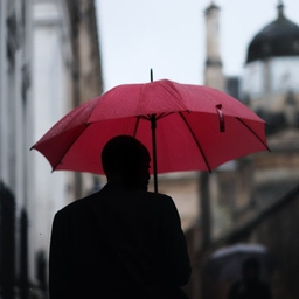

In [ ]:
umbrella_pic = load_img(FILE_1, target_size=(299, 299)) #Pic size has to be 299x299 if you want to predict
display(umbrella_pic)

In [ ]:
umbrella_pic_array = img_to_array(umbrella_pic)
umbrella_pic_array.shape

(299, 299, 3)

In [ ]:
expanded_picture = np.expand_dims(umbrella_pic_array, axis=0)
expanded_picture.shape # Predictions Requires 4 dimensions

(1, 299, 299, 3)

In [ ]:
preprocessed = preprocess_input(expanded_picture) # Increasing the prediction accuracy

# Improving Keras models and Tenserflow graph

In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2

In [ ]:
%%time

inception_model = InceptionResNetV2(weights='imagenet')

225209952/225209952 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
CPU times: user 4.99 s, sys: 1.08 s, total: 6.07 s
Wall time: 16.1 s


In [ ]:
inception_model.graph = tf.compat.v1.get_default_graph()

# Predictions

In [ ]:
from keras.applications.inception_resnet_v2 import decode_predictions

In [ ]:
prediction = inception_model.predict(preprocessed)
decode_predictions(prediction) # [['Class name', 'Class Discription', 'Probability']]

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


[[('n04507155', 'umbrella', 0.8298832),
  ('n03788195', 'mosque', 0.0012544612),
  ('n03792972', 'mountain_tent', 0.0012220632),
  ('n03220513', 'dome', 0.0011231161),
  ('n04479046', 'trench_coat', 0.0010624707)]]

In [ ]:
def format_img_inceptionresnet(file_name):
  selected_pic = load_img(file_name, target_size=(299,299))
  selected_pic_to_array = img_to_array(selected_pic)
  expanded_pic = np.expand_dims(selected_pic_to_array, axis=0)

  return preprocess_input(expanded_pic)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


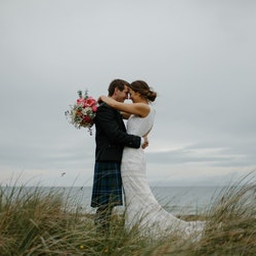

[[('n10148035', 'groom', 0.60605514),
  ('n03450230', 'gown', 0.17247115),
  ('n11879895', 'rapeseed', 0.022019017),
  ('n09421951', 'sandbar', 0.01788329),
  ('n03534580', 'hoopskirt', 0.011139503)]]

In [ ]:
data = format_img_inceptionresnet(FILE_2)
prediction = inception_model.predict(data)
display(load_img(FILE_2))
decode_predictions(prediction) # Result: 'groom', 0.6060552

# Testing the VGG19(Visual Geometry Group) Model

In [ ]:
from keras.applications.vgg19 import VGG19, preprocess_input as preprocess_input_vgg19, decode_predictions as decode_vgg19

In [ ]:
inception_model = VGG19(weights='imagenet')

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 28s 0us/step


In [ ]:
inception_model_graph = tf.compat.v1.get_default_graph()

In [ ]:
def format_img_vgg19(filename):
  pic = load_img(filename, target_size=(224,224))
  pic_to_array = img_to_array(pic)
  expanded_pic = np.expand_dims(pic_to_array, axis=0)

  return preprocess_input_vgg19(expanded_pic)

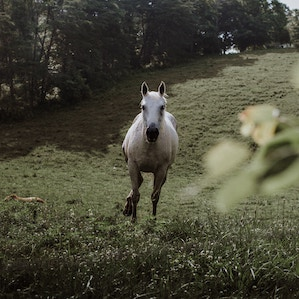

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


[[('n02412080', 'ram', 0.74008626),
  ('n02415577', 'bighorn', 0.10954285),
  ('n02403003', 'ox', 0.017425872),
  ('n02437616', 'llama', 0.012746366),
  ('n02091134', 'whippet', 0.008596686)]]

In [ ]:
data = format_img_vgg19('04 Horse.jpg')
display(load_img('04 Horse.jpg'))
prediction = inception_model.predict(data)
decode_vgg19(prediction)

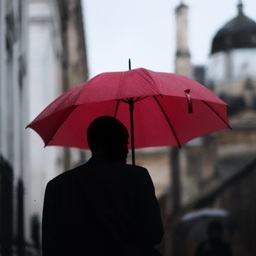

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[[('n04507155', 'umbrella', 0.9999784),
  ('n03599486', 'jinrikisha', 3.4472398e-06),
  ('n03637318', 'lampshade', 2.6932832e-06),
  ('n07734744', 'mushroom', 1.8590983e-06),
  ('n03888257', 'parachute', 1.2822439e-06)]]

In [ ]:
data = format_img_vgg19(FILE_1)
display(load_img(FILE_1))
prediction = inception_model.predict(data)
decode_predictions(prediction) # Results: umbrella = 0.9999784